# Check outputs

In [192]:
# Env: phd_v3
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)
import calendar
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [193]:
path = '/home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/FR-Cdp_run'

In [194]:
!ls {path}

actlyr_daily.nc		   gpp_daily.nc		     ra_monthly.nc
actlyrmax_monthly.nc	   gpp_monthly.nc	     rh_daily.nc
actlyrmin_monthly.nc	   hfg_monthly.nc	     rh_monthly.nc
actlyr_monthly.nc	   hfls_daily.nc	     rls_daily.nc
albs_daily.nc		   hfls_monthly.nc	     rls_monthly.nc
albsir_daily.nc		   hfss_daily.nc	     rsds_monthly.nc
albs_monthly.nc		   hfss_monthly.nc	     rSoil_monthly.nc
albsn_daily.nc		   lai_daily.nc		     rss_daily.nc
albsn_monthly.nc	   lai_monthly.nc	     rss_monthly.nc
albsvis_daily.nc	   landCoverFrac_monthly.nc  sftlf.nc
bleafmas_daily.nc	   mrrob_daily.nc	     snc_daily.nc
cLeaf_daily.nc		   mrrob_monthly.nc	     snc_monthly.nc
cLeaf_monthly.nc	   mrroc_daily.nc	     snd_daily.nc
cRoot_daily.nc		   mrro_daily.nc	     snd_monthly.nc
cRoot_monthly.nc	   mrroi_daily.nc	     snm_daily.nc
cSoil_monthly.nc	   mrro_monthly.nc	     snw_daily.nc
cStem_daily.nc		   mrron_daily.nc	     snwdens_daily.nc
cStem_monthly.nc	   mrros_daily.nc	     snw_monthly.nc
cVeg_monthly.nc		 

As we generally start the C pools, etc. from zero it takes several runs to spin up sites. Especially the high-latitude sites tend to be slower to spin up. To check whether the model is spun up, we usually look at the outputs for NBP, soil C, etc. to see whether they’re relatively stable or close to zero for NBP averaged over several years. An easy check is to look at the ratio of NEP/NPP. We usually say that a site is spun up, if the absolute value of NEP/NPP is less than 0.02.

In [153]:
!ncdump -h {path}/mrrob_monthly.nc

netcdf mrrob_monthly {
dimensions:
	lon = 1 ;
	lat = 1 ;
	time = 228 ;
variables:
	double longitude(lon) ;
		longitude:standard_name = "Longitude" ;
		longitude:long_name = "longitude" ;
		longitude:units = "degrees_east" ;
	double latitude(lat) ;
		latitude:long_name = "latitude" ;
		latitude:standard_name = "Latitude" ;
		latitude:units = "degrees_north" ;
	double time(time) ;
		time:long_name = "time" ;
		time:units = "days since 1994-12-31 00:00" ;
		time:calendar = "standard" ;
	double mrrob(time, lat, lon) ;
		mrrob:long_name = "Subsurface runoff (baseflow, not including interflow)" ;
		mrrob:units = "kg m$^{-2}$ s$^{-1}$" ;
		mrrob:_FillValue = 1.e+38 ;
		mrrob:nameInCode = "rofbacc_mo" ;

// global attributes:
		:title = "CLASSIC output file" ;
		:timestamp = "20231116 0830" ;
		:Conventions = "COARDS" ;
		:node_offset = 1 ;
		:Comment = " run" ;
}


In [176]:
freq = 'monthly'

tas = xr.open_dataset(path+'/tas_'+freq+'.nc').tas
snc = xr.open_dataset(path+'/snc_'+freq+'.nc').snc
snd = xr.open_dataset(path+'/snd_'+freq+'.nc').snd
snw = xr.open_dataset(path+'/snw_'+freq+'.nc').snw
nbp = xr.open_dataset(path+'/nbp_'+freq+'.nc').nbp # net mass flux of carbon from atmosphere into land
nep = xr.open_dataset(path+'/nep_'+freq+'.nc').nep # Natural flux of CO2 atm -> land
npp = xr.open_dataset(path+'/npp_'+freq+'.nc').npp # Carbon Mass Flux out of Atmosphere due to Net Primary Production
cSoil = xr.open_dataset(path+'/cSoil_'+freq+'.nc').cSoil # Carbon mass in the full depth of the soil model
lai = xr.open_dataset(path+'/lai_'+freq+'.nc').lai # Carbon mass in the full depth of the soil model
# vegHeight = xr.open_dataset(path+'/vegHeight_'+freq+'.nc').vegHeight

albs = xr.open_dataset(path+'/albs_'+freq+'.nc').albs
albsn = xr.open_dataset(path+'/albsn_'+freq+'.nc').albsn

mrrob = xr.open_dataset(path+'/mrrob_'+freq+'.nc').mrrob
mrro = xr.open_dataset(path+'/mrro_'+freq+'.nc').mrro
mrros = xr.open_dataset(path+'/mrros_'+freq+'.nc').mrros

In [196]:
freq = 'daily'

tas_daily = xr.open_dataset(path+'/tas_'+freq+'.nc').tas
snc_daily = xr.open_dataset(path+'/snc_'+freq+'.nc').snc
snd_daily = xr.open_dataset(path+'/snd_'+freq+'.nc').snd
snw_daily = xr.open_dataset(path+'/snw_'+freq+'.nc').snw
nbp_daily = xr.open_dataset(path+'/nbp_'+freq+'.nc').nbp # net mass flux of carbon from atmosphere into land
nep_daily = xr.open_dataset(path+'/nep_'+freq+'.nc').nep # Natural flux of CO2 atm -> land
npp_daily = xr.open_dataset(path+'/npp_'+freq+'.nc').npp # Carbon Mass Flux out of Atmosphere due to Net Primary Production
# cSoil_daily = xr.open_dataset(path+'/cSoil_'+freq+'.nc').cSoil # Carbon mass in the full depth of the soil model
lai_daily = xr.open_dataset(path+'/lai_'+freq+'.nc').lai # Carbon mass in the full depth of the soil model
# vegHeight = xr.open_dataset(path+'/vegHeight_'+freq+'.nc').vegHeight

albs_daily = xr.open_dataset(path+'/albs_'+freq+'.nc').albs
albsn_daily = xr.open_dataset(path+'/albsn_'+freq+'.nc').albsn

mrrob_daily = xr.open_dataset(path+'/mrrob_'+freq+'.nc').mrrob
mrro_daily = xr.open_dataset(path+'/mrro_'+freq+'.nc').mrro
mrros_daily = xr.open_dataset(path+'/mrros_'+freq+'.nc').mrros

In [19]:
lai.long_name

'Leaf Area Index'

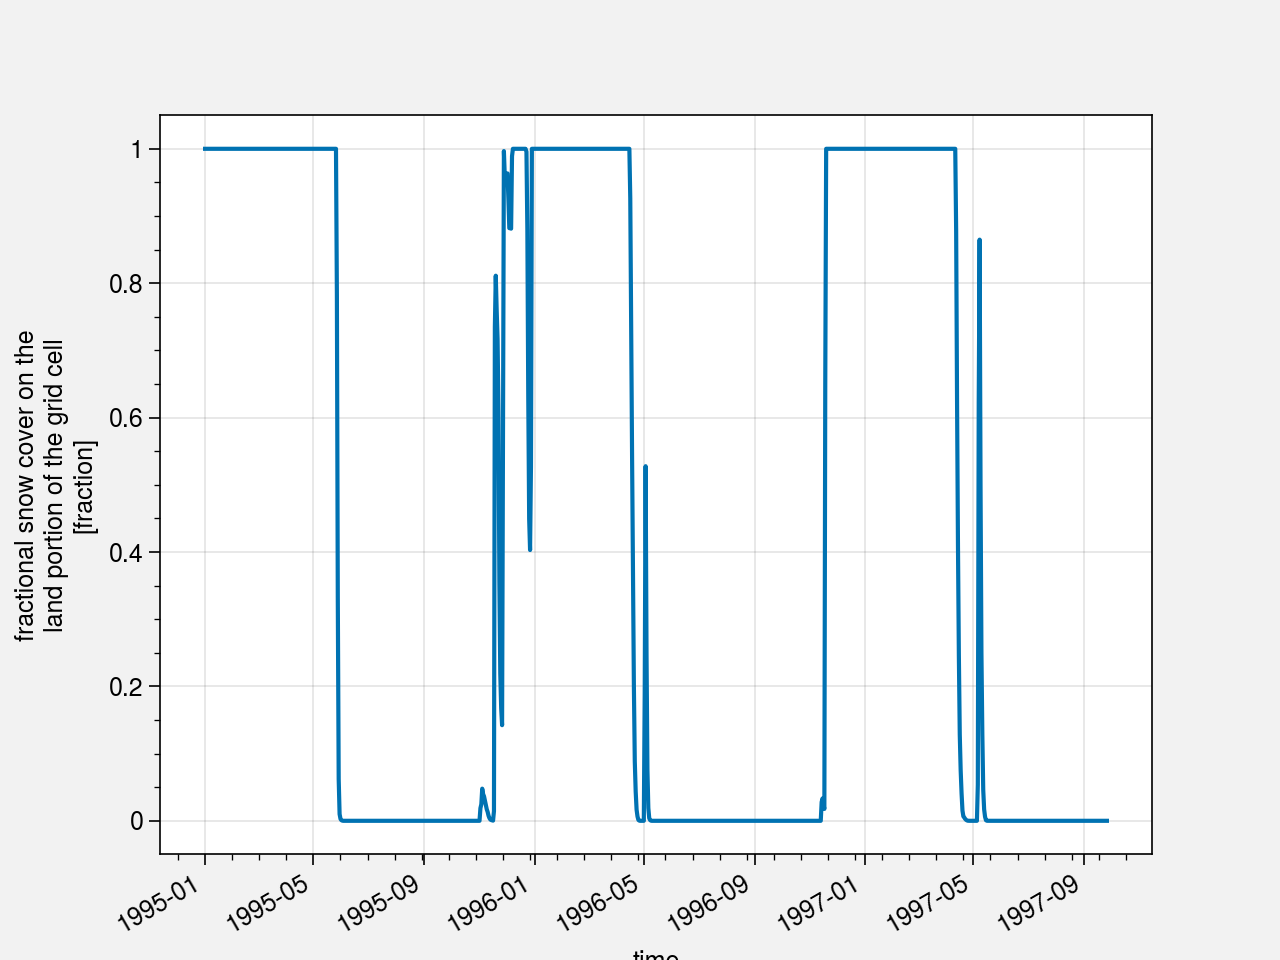

In [200]:
snc_daily[:1000].plot()

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(
/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(


Text(0.5, 0.98, 'Run Col de Porte (1995-2013)')

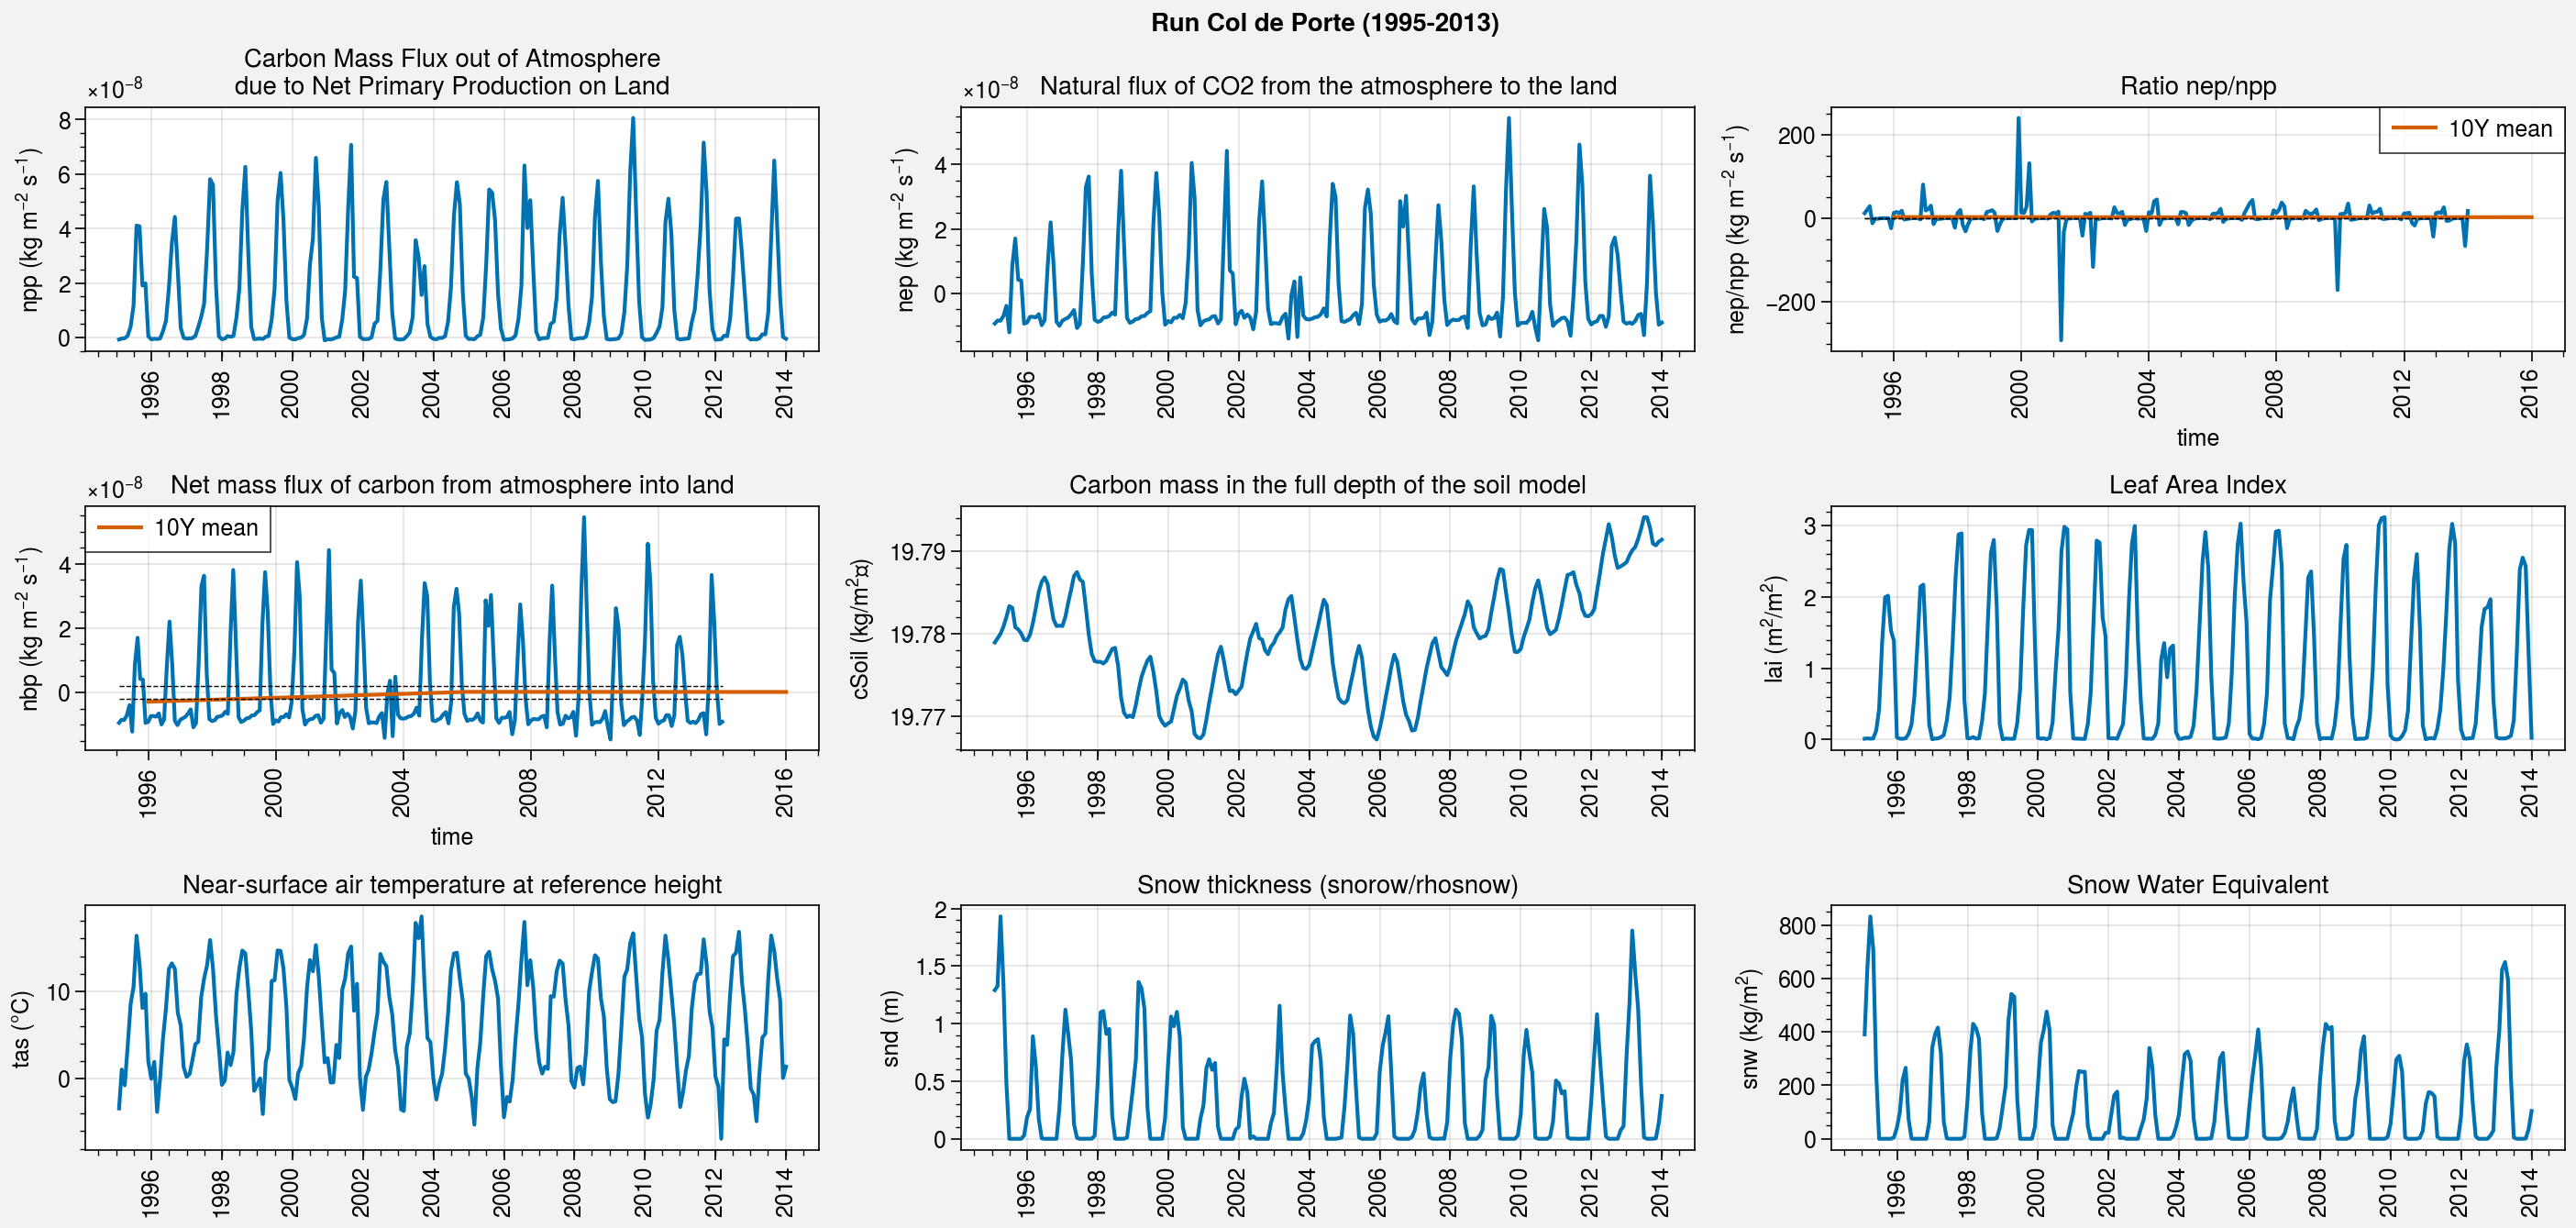

In [12]:
fig, axs = plot.subplots(ncols=3, nrows=3, aspect=3, axwidth=4, share=0)

# npp
axs[0].plot(npp)
axs[0].format(title='Carbon Mass Flux out of Atmosphere\ndue to Net Primary Production on Land', ylabel='npp ('+npp.units+')')

# nep
axs[1].plot(nep)
axs[1].format(title='Natural flux of CO2 from the atmosphere to the land', ylabel='nep ('+nep.units+')')

# nep/npp
axs[2].plot(nep/npp)
k = axs[2].plot((nep/npp).resample(time='10Y').mean(), label='10Y mean')
axs[2].plot(nep*0+0.2, color='k', lw=0.5, ls='--')
axs[2].plot(nep*0-0.2, color='k', lw=0.5, ls='--')
axs[2].format(title='Ratio nep/npp', ylabel='nep/npp ('+nep.units+')')
axs[2].legend(k)

# nbp
axs[3].plot(nbp)
axs[3].format(title='Net mass flux of carbon from atmosphere into land', ylabel='nbp ('+nbp.units+')')
k = axs[3].plot(nbp.resample(time='10Y').mean(), label='10Y mean')
axs[3].plot(nbp*0+0.2*10e-9, color='k', lw=0.5, ls='--')
axs[3].plot(nbp*0-0.2*10e-9, color='k', lw=0.5, ls='--')
axs[3].legend(k)

# cSoil
axs[4].plot(cSoil)
axs[4].format(title='Carbon mass in the full depth of the soil model', ylabel='cSoil ('+cSoil.units+')')

# lai
axs[5].plot(lai)
axs[5].format(title=lai.long_name, ylabel='lai ('+lai.units+')')

# tas
axs[6].plot(tas-273.15)
axs[6].format(title=tas.long_name, ylabel='tas (°C)')

# snd
axs[7].plot(snd)
axs[7].format(title=snd.long_name, ylabel='snd ('+snd.units+')')

# snw
axs[8].plot(snw)
axs[8].format(title='Snow Water Equivalent', ylabel='snw ('+snw.units+')')

fig.suptitle('Run Col de Porte (1995-2013)')

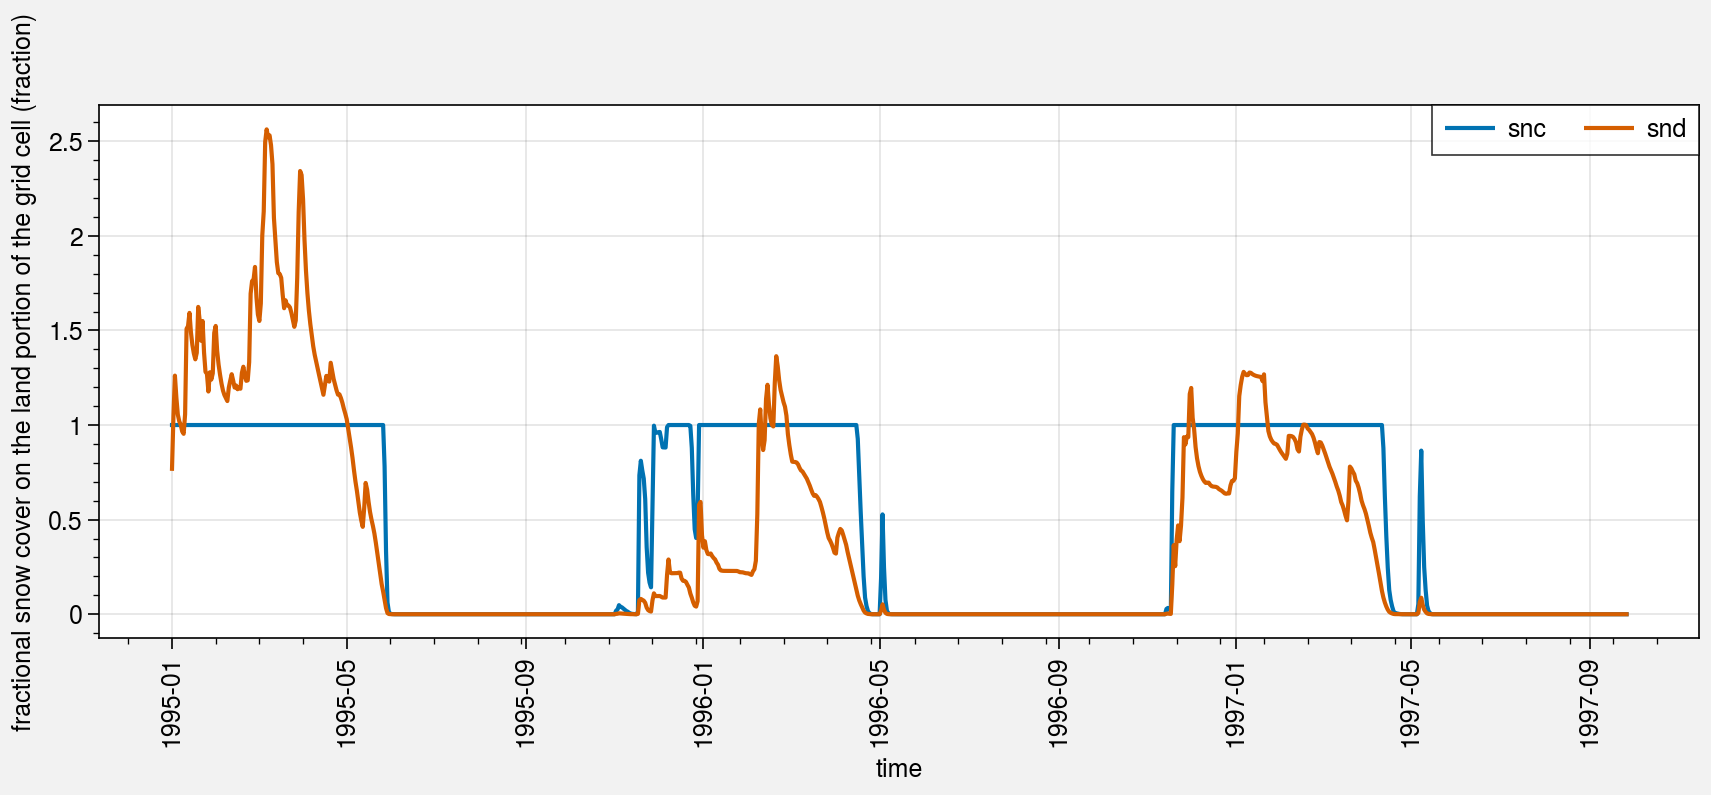

In [205]:
fig, axs = plot.subplots(ncols=1, nrows=1, aspect=3, axwidth=8)

i_start = 0
i_end = 1000

axs[0].plot(snc_daily[0:i_end], label="snc")
axs[0].plot(snd_daily[0:i_end], label="snd")
# axs[0].plot(snw[0:24])

axs[0].legend()


(<matplotlib.lines.Line2D at 0x15114de883a0>,)

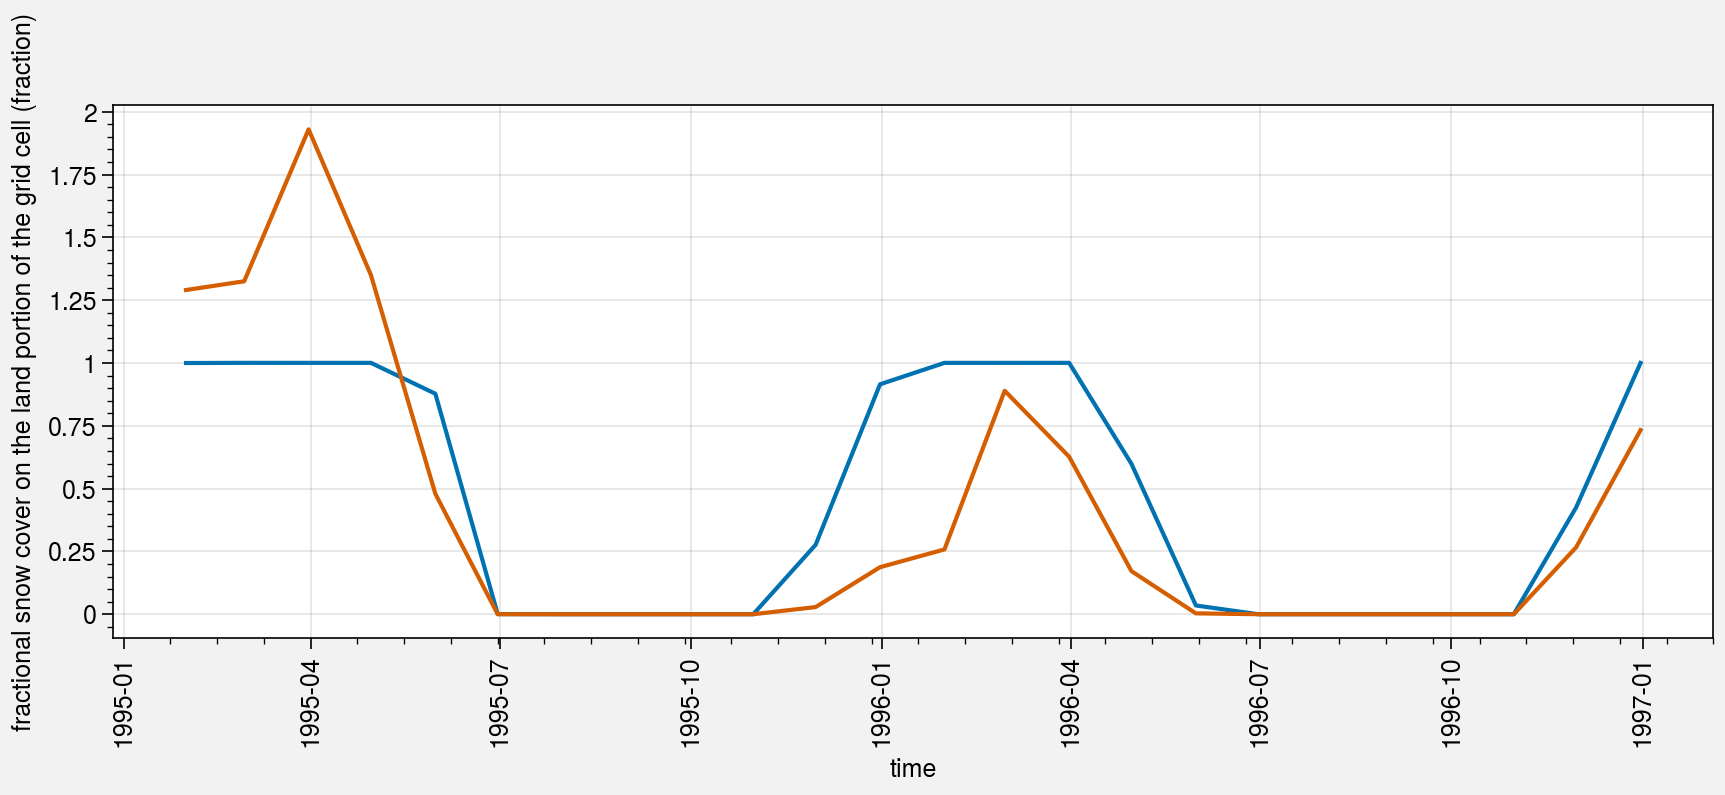

In [191]:
fig, axs = plot.subplots(ncols=1, nrows=1, aspect=3, axwidth=8)

i_start = 0
i_end = 24

axs[0].plot(snc[0:24])
axs[0].plot(snd[0:24])
# axs[0].plot(snw[0:24])


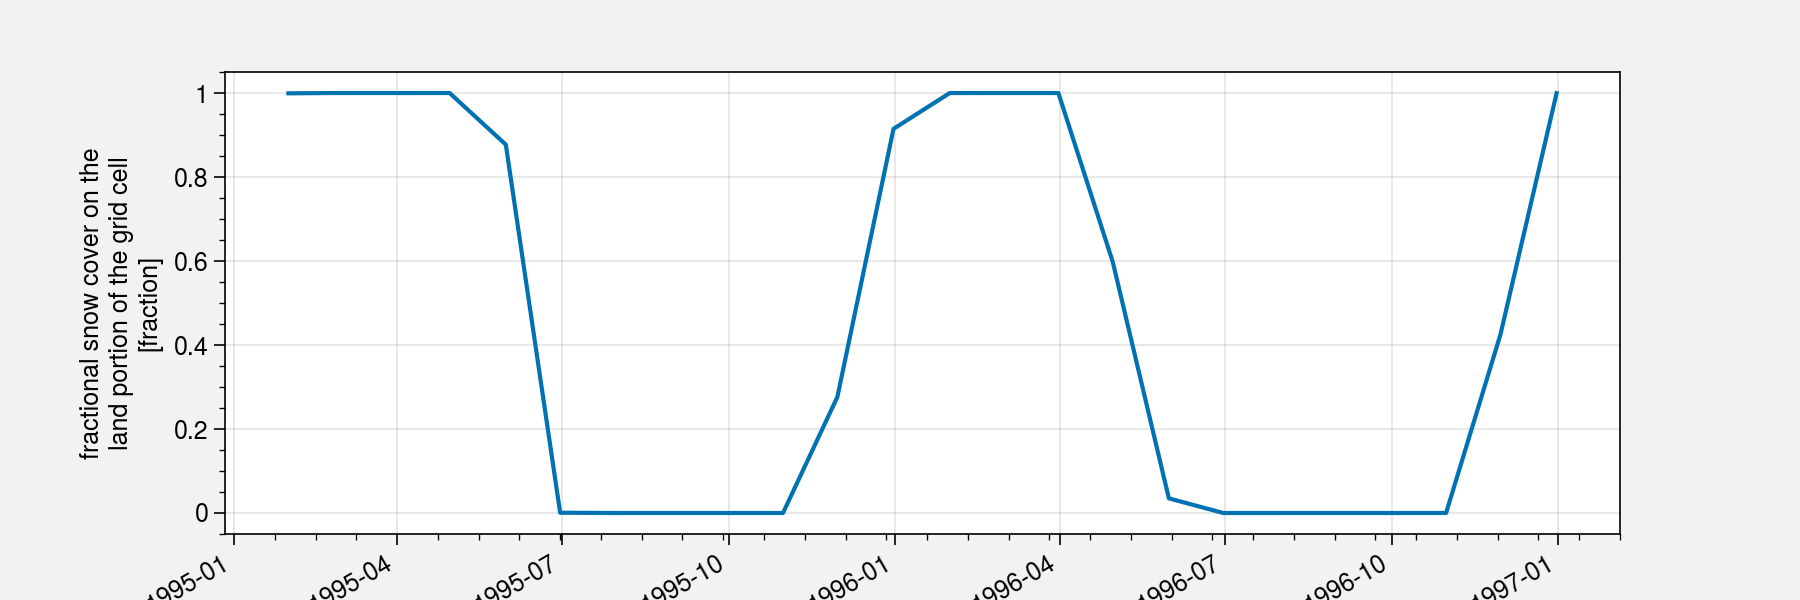

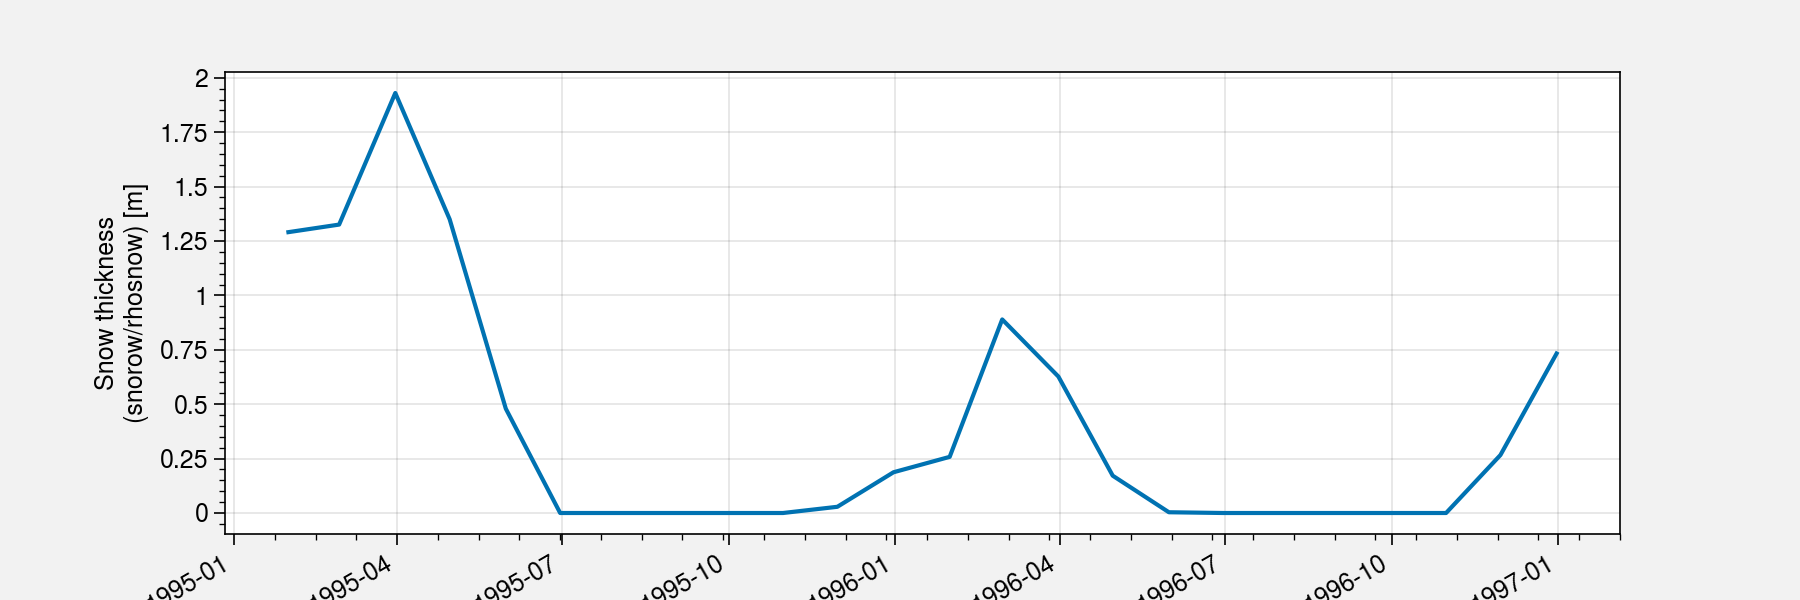

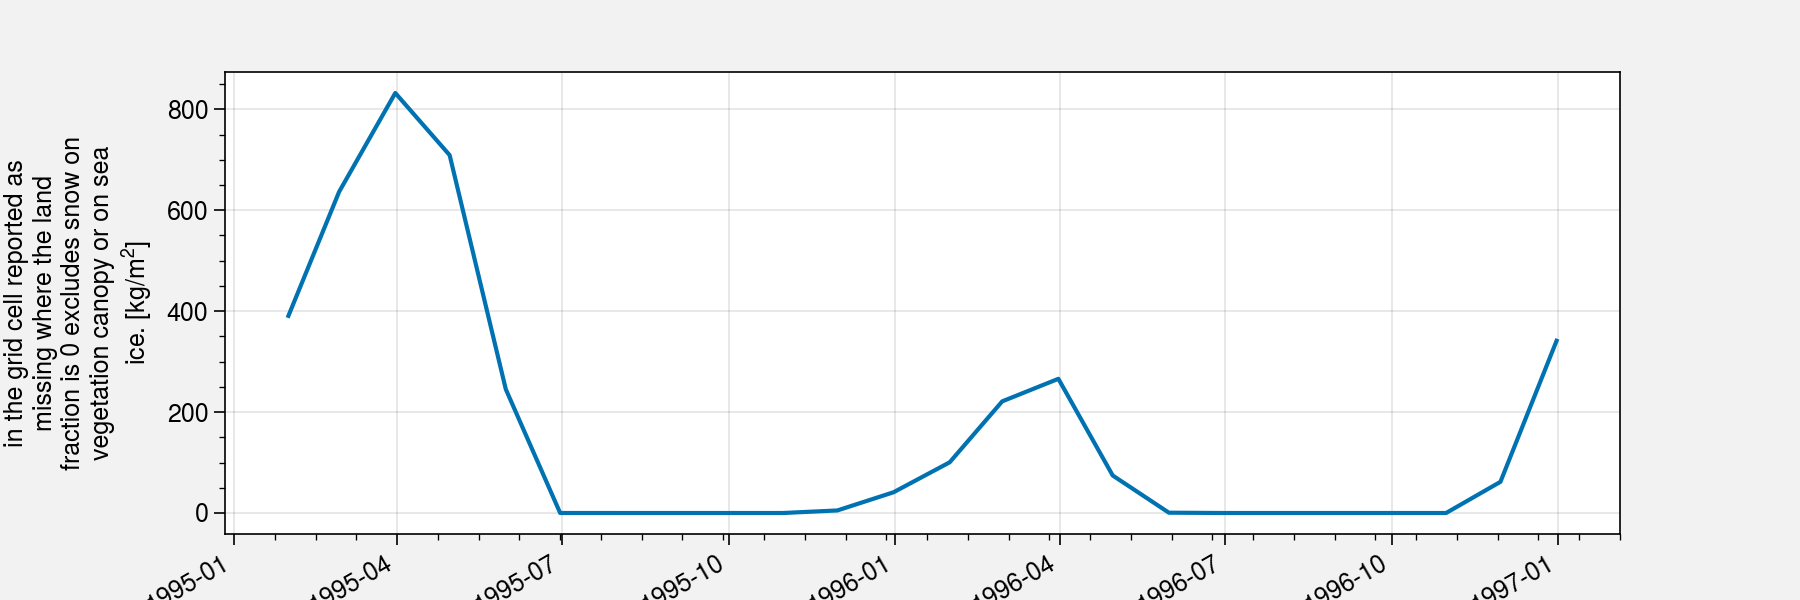

In [184]:
snc[0:24].plot(aspect=3, size=3)
snd[0:24].plot(aspect=3, size=3)
snw[0:24].plot(aspect=3, size=3)


## Load obs
https://doi.pangaea.de/10.1594/PANGAEA.774249  
Downloaded: 15/11/2023

In [13]:
path = '/home/lalandmi/Dropbox/data/SnowMIP/evaluation/FR-Cdp/Morin_2012/datasets'

In [95]:
df = pd.read_csv(path+'/CDP_daily_eval.tab', skiprows=23, delimiter='\t', infer_datetime_format=True, index_col=0)
df.index = pd.to_datetime(df.index)
df

,"Snow thick [m] (automated measurement, Ultra-...)","Snow thick [m] (pit, Ruler stick)","Snow thick [m] (pit south, Ruler stick)","Snow thick [m] (pit north, Ruler stick)","SWE [kg/m**2] (Cosmic Ray Counter, NRC)","SWE [kg/m**2] (pit, Calculated from weight o...)","SWE [kg/m**2] (pit south, Calculated from we...)","SWE [kg/m**2] (pit north, Calculated from we...)","Runoff [kg/m**2/day] (Lysimeter, 5 m**2)","Runoff [kg/m**2/day] (Lysimeter, 1 m**2)",Albedo [%] (Calculated)
Date/Time,,,,,,,,,,,
1993-09-21,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-09-22,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-09-23,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-09-24,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-09-25,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2011-06-08,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,12.0,12.0,0.23
2011-06-09,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,3.1,2.6,0.24
2011-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.9,1.3,0.23


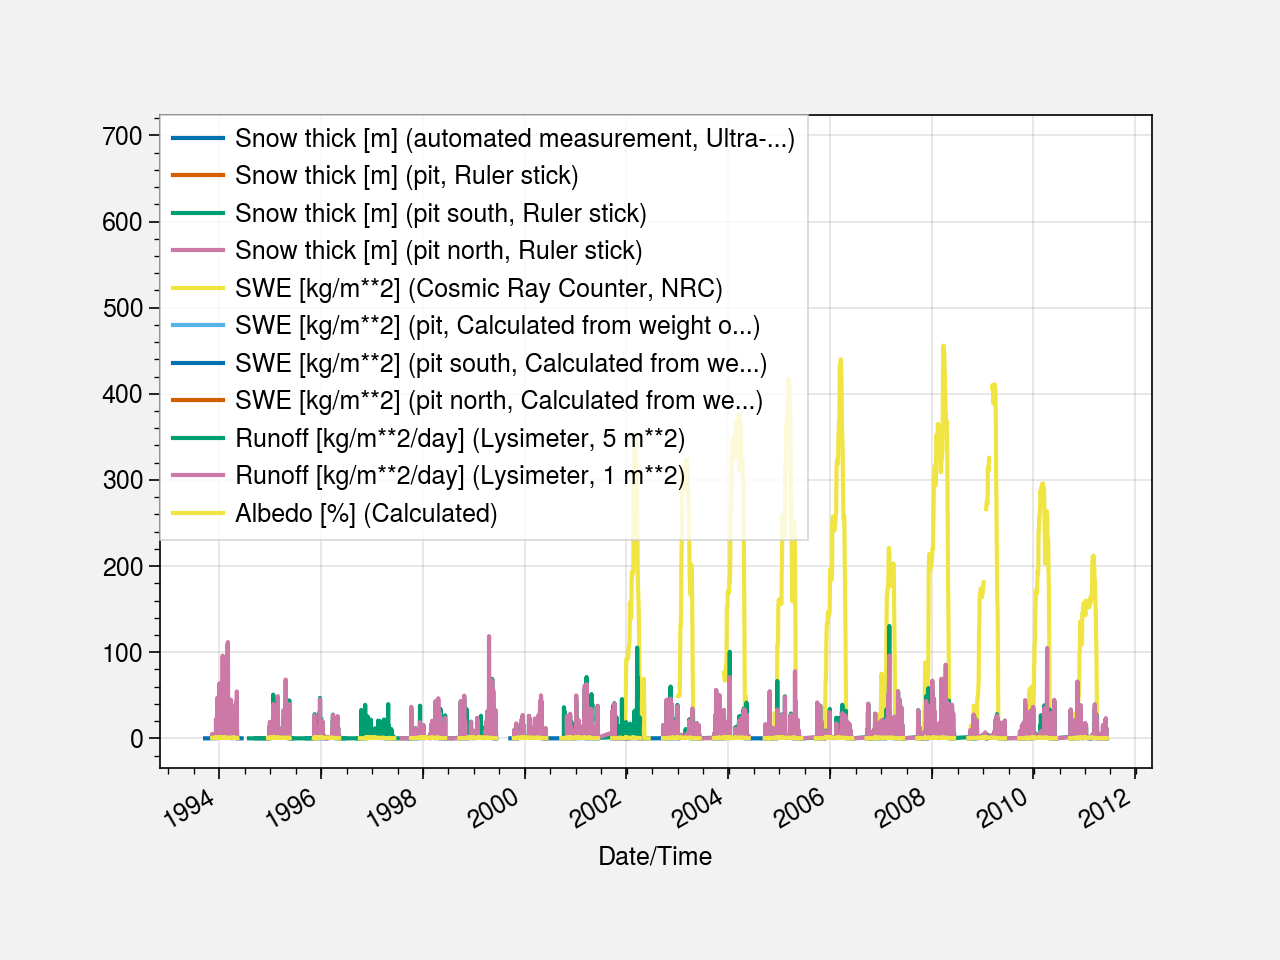

In [97]:
df.plot()

In [112]:
df.columns

Index(['Snow thick [m] (automated measurement, Ultra-...)',
       'Snow thick [m] (pit, Ruler stick)',
       'Snow thick [m] (pit south, Ruler stick)',
       'Snow thick [m] (pit north, Ruler stick)',
       'SWE [kg/m**2] (Cosmic Ray Counter, NRC)',
       'SWE [kg/m**2] (pit, Calculated from weight o...)',
       'SWE [kg/m**2] (pit south, Calculated from we...)',
       'SWE [kg/m**2] (pit north, Calculated from we...)',
       'Runoff [kg/m**2/day] (Lysimeter, 5 m**2)',
       'Runoff [kg/m**2/day] (Lysimeter, 1 m**2)', 'Albedo [%] (Calculated)'],
      dtype='object')

In [121]:
snd

<xarray.DataArray 'snd' (time: 228, lat: 1, lon: 1)>
array([[[1.290582]],

       [[1.325376]],

       ...,

       [[0.138926]],

       [[0.371245]]])
Coordinates:
  * time     (time) datetime64[ns] 1995-01-31 1995-02-28 ... 2013-12-31
Dimensions without coordinates: lat, lon
Attributes:
    long_name:   Snow thickness (snorow/rhosnow)
    units:       m
    nameInCode:  snd_mo

In [160]:
mrro

<xarray.DataArray 'mrro' (time: 228, lat: 1, lon: 1)>
array([[[3.402821e-05]],

       [[2.540353e-05]],

       ...,

       [[6.150729e-05]],

       [[6.316935e-05]]])
Coordinates:
  * time     (time) datetime64[ns] 1995-01-31 1995-02-28 ... 2013-12-31
Dimensions without coordinates: lat, lon
Attributes:
    long_name:   The total run-off (including drainage through the base of th...
    units:       kg m$^{-2}$ s$^{-1}$
    nameInCode:  rofacc_mo

In [173]:
mrrob

<xarray.DataArray 'mrrob' (time: 228, lat: 1, lon: 1)>
array([[[3.402816e-05]],

       [[2.540330e-05]],

       ...,

       [[6.150728e-05]],

       [[6.316934e-05]]])
Coordinates:
  * time     (time) datetime64[ns] 1995-01-31 1995-02-28 ... 2013-12-31
Dimensions without coordinates: lat, lon
Attributes:
    long_name:   Subsurface runoff (baseflow, not including interflow)
    units:       kg m$^{-2}$ s$^{-1}$
    nameInCode:  rofbacc_mo

In [174]:
mrro

<xarray.DataArray 'mrro' (time: 228, lat: 1, lon: 1)>
array([[[3.402821e-05]],

       [[2.540353e-05]],

       ...,

       [[6.150729e-05]],

       [[6.316935e-05]]])
Coordinates:
  * time     (time) datetime64[ns] 1995-01-31 1995-02-28 ... 2013-12-31
Dimensions without coordinates: lat, lon
Attributes:
    long_name:   The total run-off (including drainage through the base of th...
    units:       kg m$^{-2}$ s$^{-1}$
    nameInCode:  rofacc_mo

In [175]:
mrros

<xarray.DataArray 'mrros' (time: 228, lat: 1, lon: 1)>
array([[[4.915175e-11]],

       [[2.345543e-10]],

       ...,

       [[1.120326e-11]],

       [[1.656721e-11]]])
Coordinates:
  * time     (time) datetime64[ns] 1995-01-31 1995-02-28 ... 2013-12-31
Dimensions without coordinates: lat, lon
Attributes:
    long_name:   The total surface run off leaving the land portion of the gr...
    units:       kg m$^{-2}$ s$^{-1}$
    nameInCode:  ovracc_mo

Text(0.5, 0.98, 'Col de Porte')

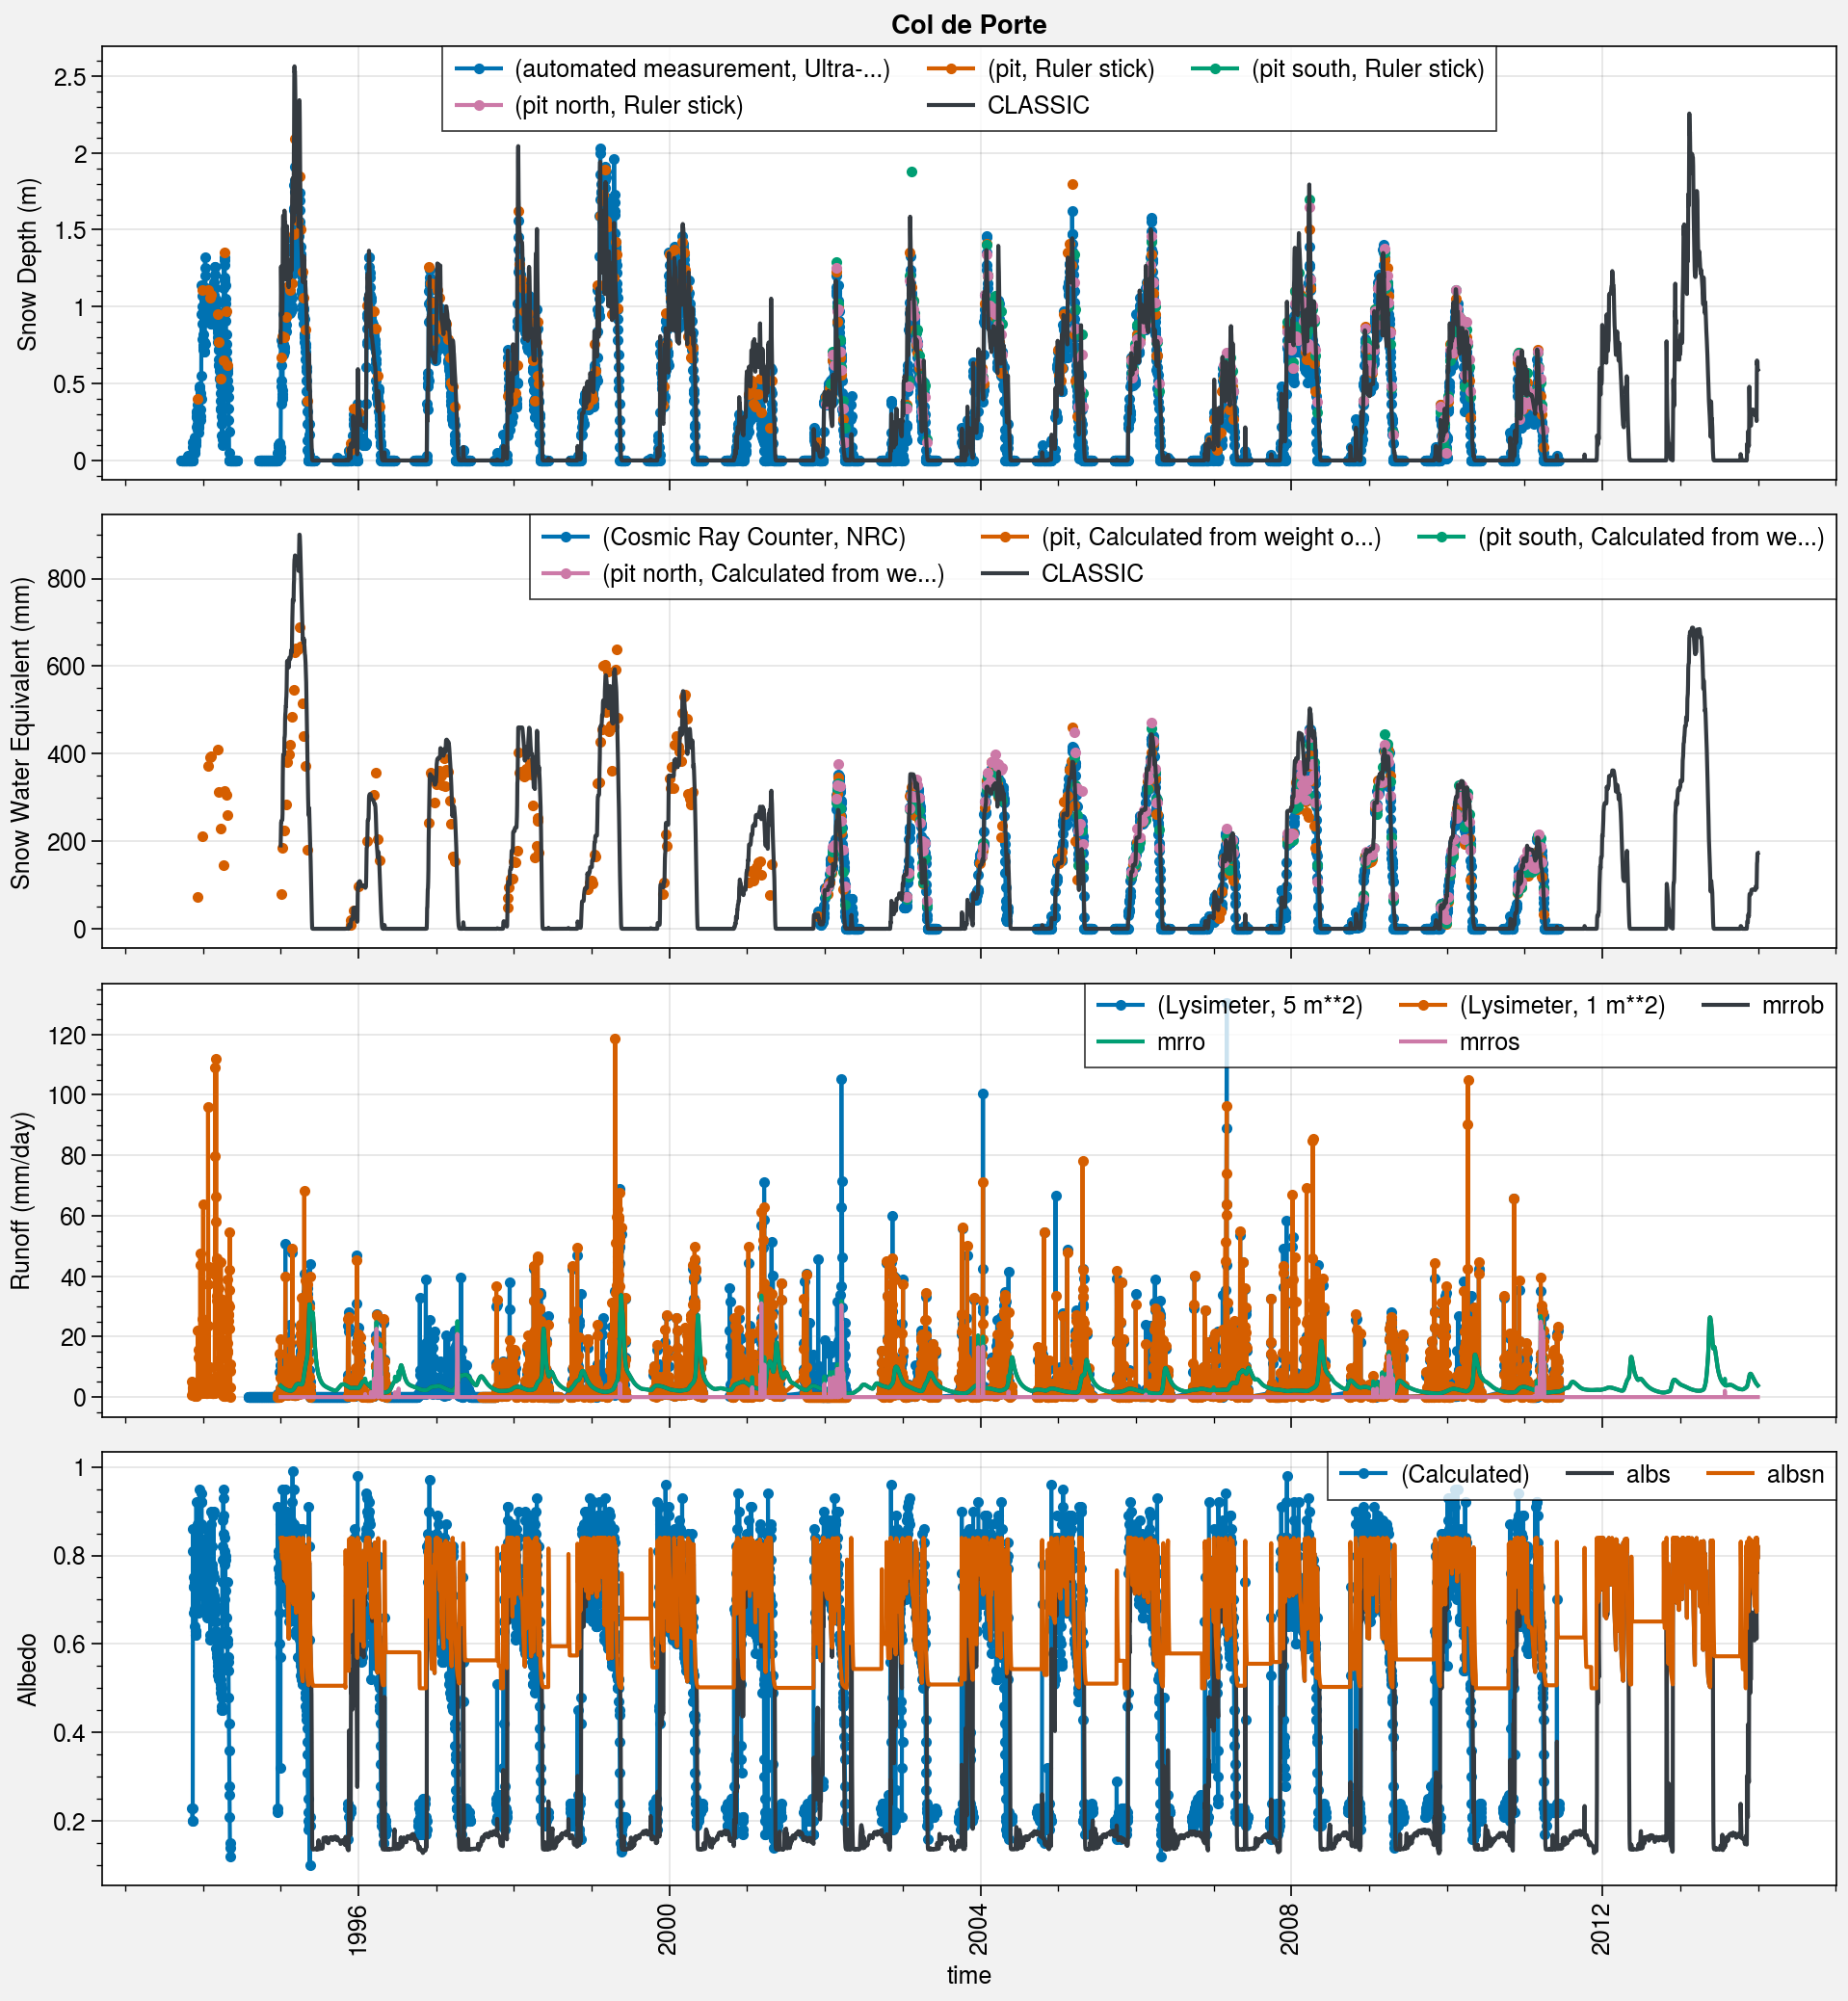

In [206]:
fig, axs = plot.subplots(ncols=1, nrows=4, aspect=4, axwidth=9, sharey=0)

color_model = 'gray8'
label_model = 'CLASSIC'

axs[0].plot(df.iloc[:, 0:4], marker='.', labels=[col[15:] for col in df.columns[0:4]])
axs[0].plot(snd_daily, color=color_model, label=label_model)
axs[0].format(ylabel='Snow Depth (m)')
axs[0].legend()

axs[1].plot(df.iloc[:, 4:8], marker='.', labels=[col[14:] for col in df.columns[4:8]])
axs[1].plot(snw_daily, color=color_model, label=label_model)
axs[1].format(ylabel='Snow Water Equivalent (mm)')
axs[1].legend()

axs[2].plot(df.iloc[:, 8:10], marker='.', labels=[col[21:] for col in df.columns[8:10]])
axs[2].plot(mrrob_daily*86400, color=color_model, label='mrrob')
axs[2].plot(mrro_daily*86400, label='mrro')
axs[2].plot(mrros_daily*86400, label='mrros')
axs[2].format(ylabel='Runoff (mm/day)')
axs[2].legend()

axs[3].plot(df.iloc[:, 10], marker='.', labels=df.columns[10][11:])
axs[3].plot(albs_daily, color=color_model, label='albs')
axs[3].plot(albsn_daily, label='albsn')
axs[3].format(ylabel='Albedo')
axs[3].legend()

fig.suptitle('Col de Porte')

Text(0.5, 0.98, 'Col de Porte')

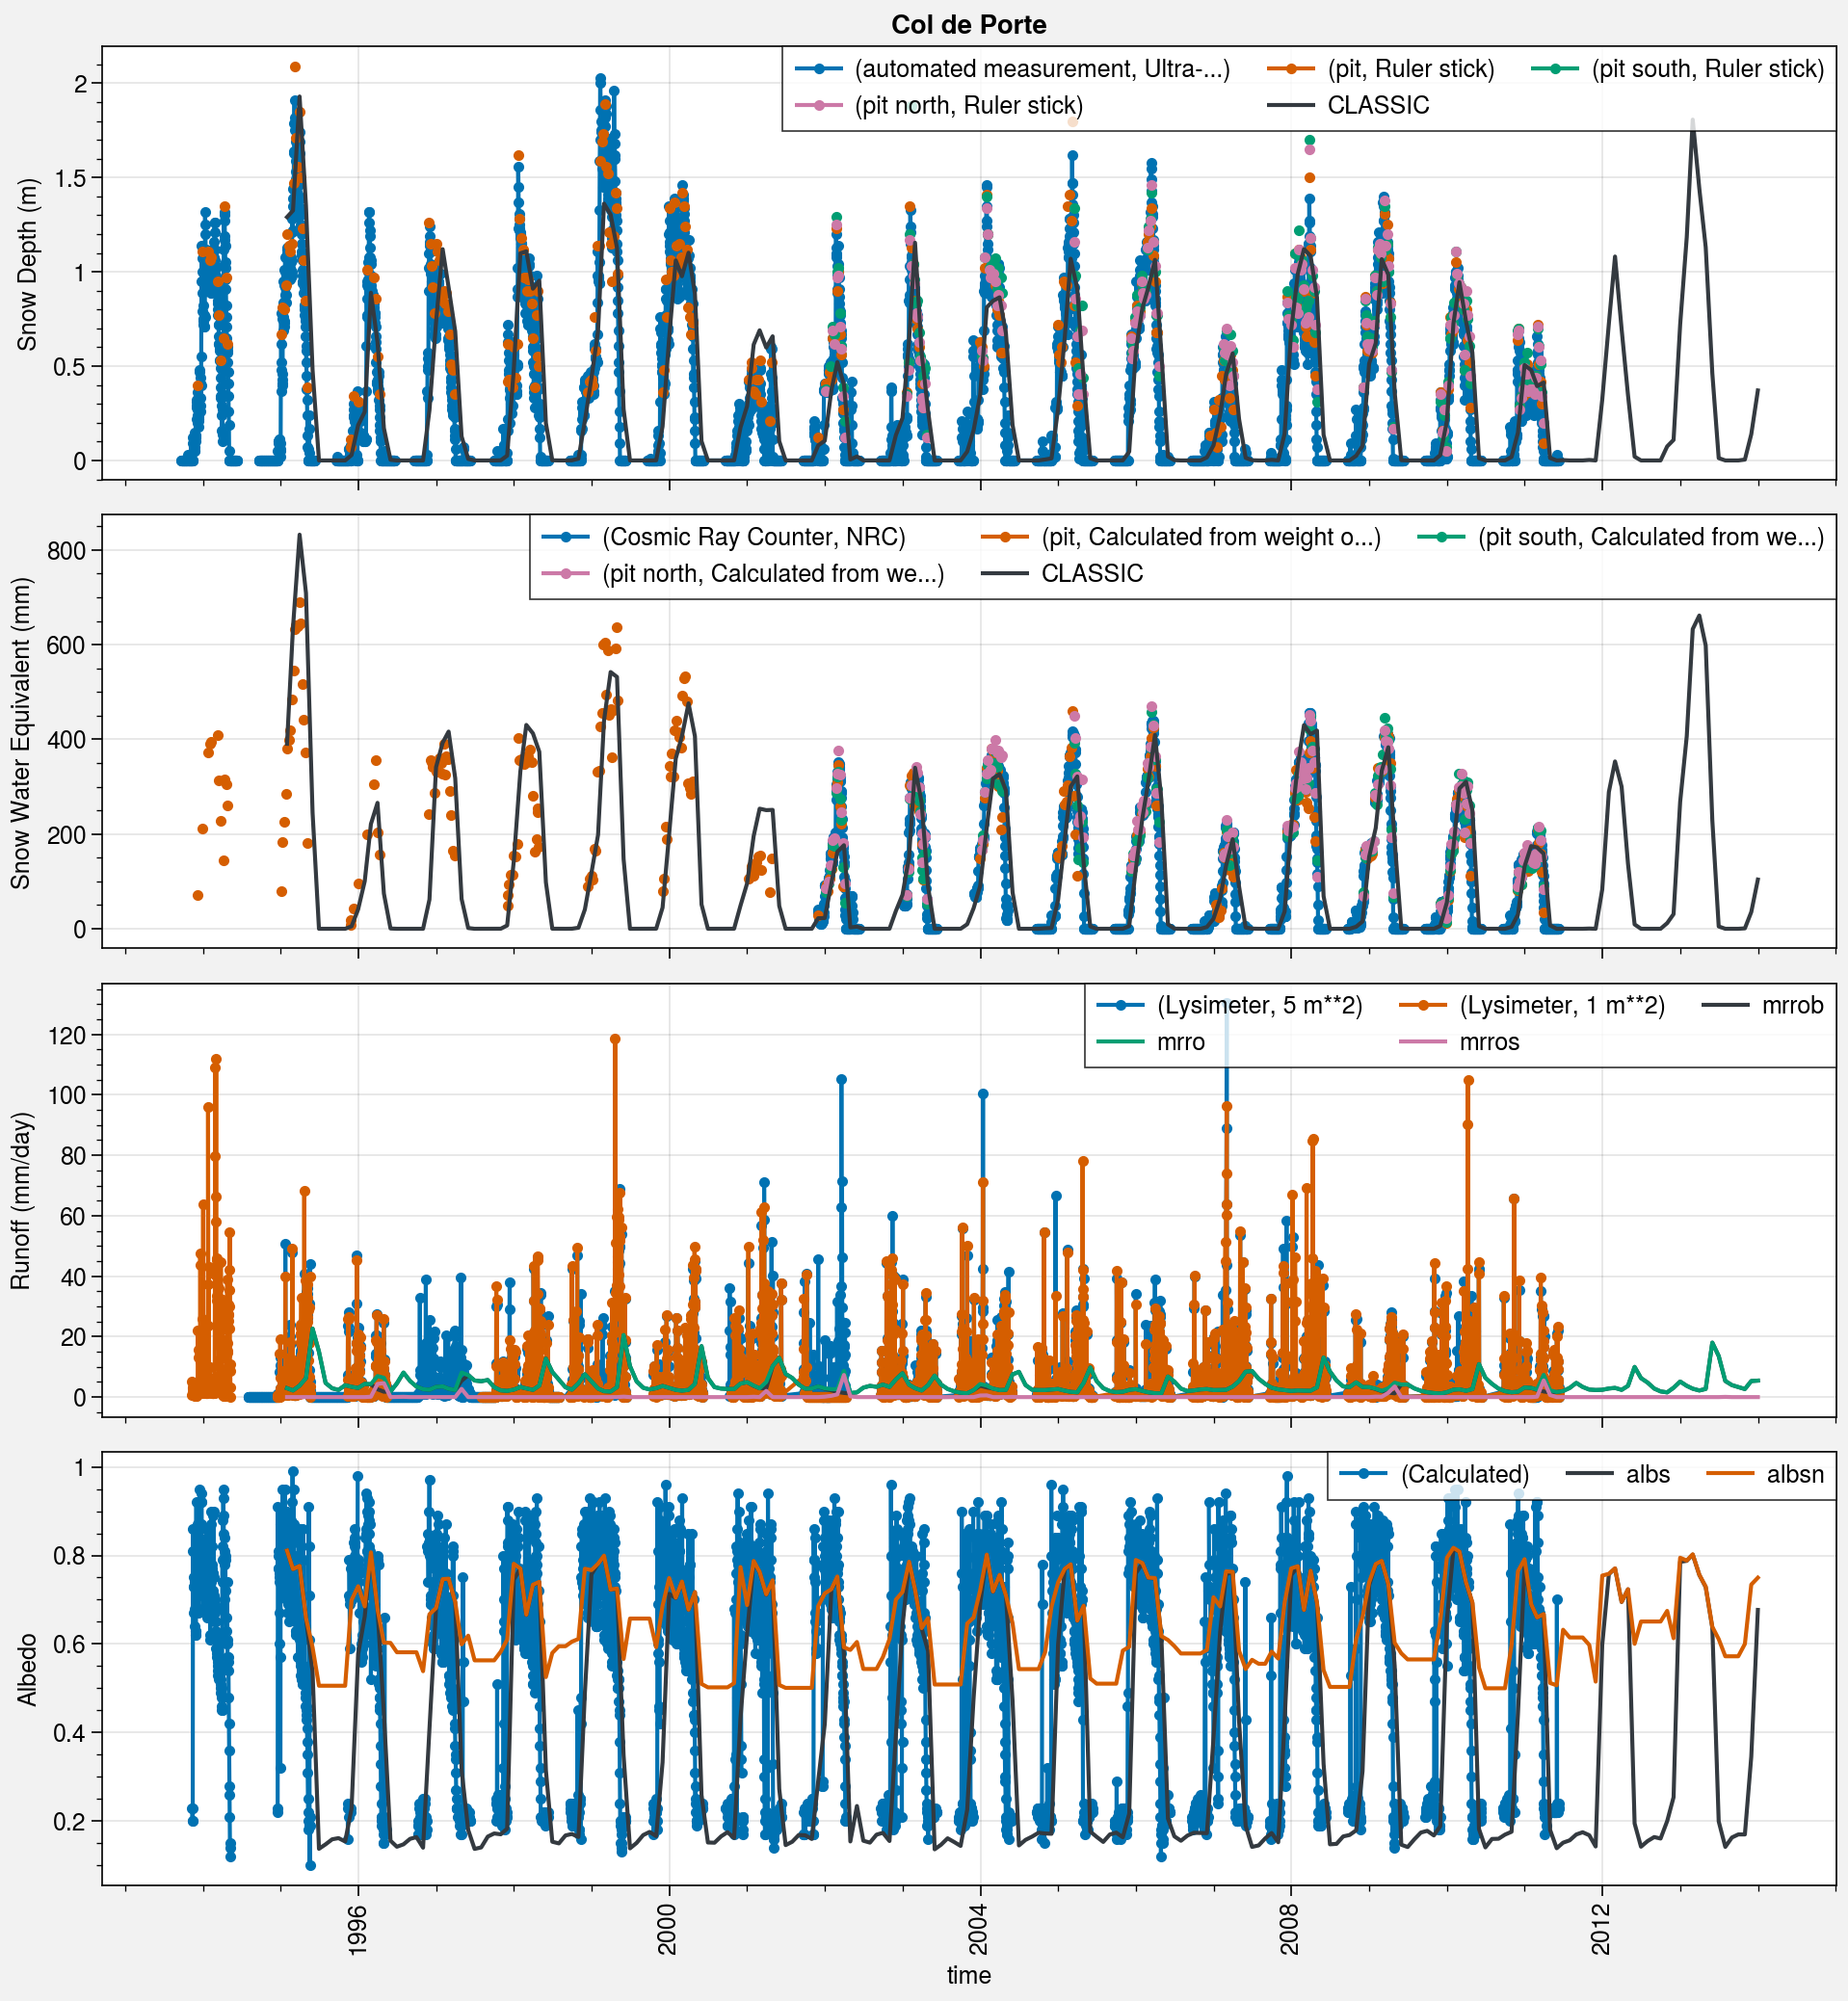

In [172]:
fig, axs = plot.subplots(ncols=1, nrows=4, aspect=4, axwidth=9, sharey=0)

color_model = 'gray8'
label_model = 'CLASSIC'

axs[0].plot(df.iloc[:, 0:4], marker='.', labels=[col[15:] for col in df.columns[0:4]])
axs[0].plot(snd, color=color_model, label=label_model)
axs[0].format(ylabel='Snow Depth (m)')
axs[0].legend()

axs[1].plot(df.iloc[:, 4:8], marker='.', labels=[col[14:] for col in df.columns[4:8]])
axs[1].plot(snw, color=color_model, label=label_model)
axs[1].format(ylabel='Snow Water Equivalent (mm)')
axs[1].legend()

axs[2].plot(df.iloc[:, 8:10], marker='.', labels=[col[21:] for col in df.columns[8:10]])
axs[2].plot(mrrob*86400, color=color_model, label='mrrob')
axs[2].plot(mrro*86400, label='mrro')
axs[2].plot(mrros*86400, label='mrros')
axs[2].format(ylabel='Runoff (mm/day)')
axs[2].legend()

axs[3].plot(df.iloc[:, 10], marker='.', labels=df.columns[10][11:])
axs[3].plot(albs, color=color_model, label='albs')
axs[3].plot(albsn, label='albsn')
axs[3].format(ylabel='Albedo')
axs[3].legend()

fig.suptitle('Col de Porte')